# Modeling and evaluation

## Statsmodels

[statsmodels](http://statsmodels.sourceforge.net)

In [1]:
import os
import pandas as pd
import requests
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import numpy as np

In [2]:
path= "https://raw.githubusercontent.com/kogilo/data_science_projects/master/data/Iris.csv"

df = pd.read_csv(path)

In [3]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [4]:
cols = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm','Species']

In [5]:
df = df[cols]

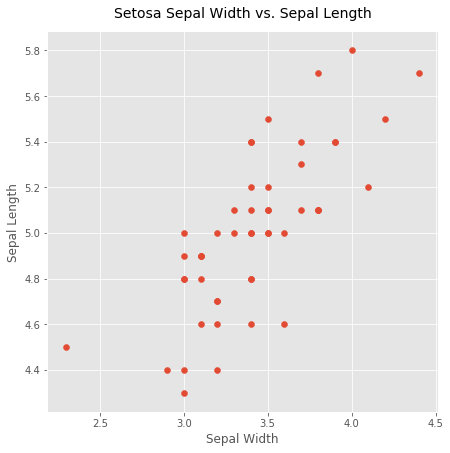

In [6]:
# First, let's visually inspect the relationship with a scatterplot:
fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(df['SepalWidthCm'][:50], df['SepalLengthCm'][:50])

ax.set_ylabel('Sepal Length')
ax.set_xlabel('Sepal Width')

ax.set_title('Setosa Sepal Width vs. Sepal Length', fontsize=14, y=1.02);


* Therefore, as the sepal width increases, sepal length does as well.

### We next run a linear regression model on the data using statsmodels to estimate the strength of this relationship:

In [7]:
import statsmodels.api as sm

y = df['SepalLengthCm'][:50]
x = df['SepalWidthCm'][:50]

X = sm.add_constant(x)

In [8]:
results = sm.OLS(y, X).fit()# fit the model

In [9]:
print(results.summary()) 

                            OLS Regression Results                            
Dep. Variable:          SepalLengthCm   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.548
Method:                 Least Squares   F-statistic:                     60.52
Date:                Thu, 11 Jun 2020   Prob (F-statistic):           4.75e-10
Time:                        23:35:34   Log-Likelihood:                 2.0879
No. Observations:                  50   AIC:                           -0.1759
Df Residuals:                      48   BIC:                             3.648
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            2.6447      0.305      8.660   

In [10]:
# SepalLengthCm = 2.6447 + 0.6909 * SepalWidthCm

# R-squared = 0.558

# the p-value (Prob) is highly significant—at least for this class.

In [11]:
## Let's now use the results object to plot our regression line:

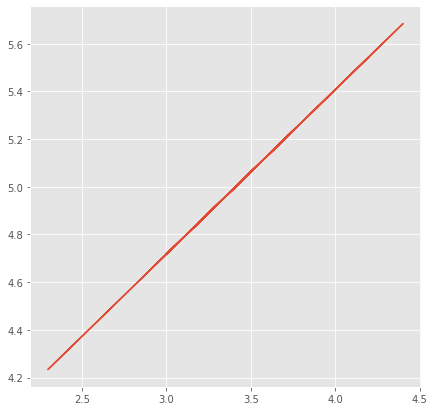

In [12]:
fig, ax = plt.subplots(figsize=(7,7))
ax.plot(x, results.fittedvalues, label='regression line');

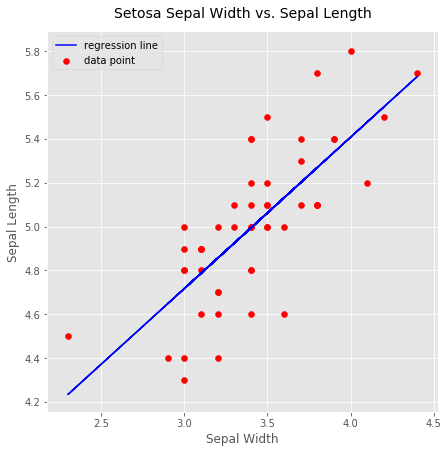

In [13]:
fig, ax = plt.subplots(figsize=(7,7))
ax.plot(x, results.fittedvalues, label='regression line', color='b');
ax.scatter(x, y, label='data point', color='r')

ax.set_ylabel('Sepal Length')
ax.set_xlabel('Sepal Width')

ax.set_title('Setosa Sepal Width vs. Sepal Length', fontsize=14, y=1.02)
ax.legend(loc=2);

## Scikit-learn
* the king of Python machine learning packages
* covers: `classification`, `regression`, `clustering`, `dimensionality reduction`, `model selection`, and `preprocessing`.

### machine learning model in scikit-learn 
* Step 1: understanding how the data must be structured.
    - independent variables should be a numeric `n x m matrix`, X; 
    * dependent variable, y; and an `n x 1 vector`.
    * the y vector may be either `numeric continuous` or `categorical` or `string categorical`.

* Step 2: These are then passed into the .fit() method on the chosen classifier. 

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [15]:
# model
clf = RandomForestClassifier(max_depth=5, n_estimators=10)

In [16]:
X = df.iloc[:,:4]
y = df.iloc[:,4]


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

In [18]:
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [19]:
y_pred = clf.predict(X_test)

In [20]:
rf = pd.DataFrame(list(zip(y_pred, y_test)), columns=['predicted',
   'actual'])
rf['correct'] = rf.apply(lambda r: 1 if r['predicted'] ==r['actual'] else 0, axis=1)
rf

,predicted,actual,correct
0,Iris-versicolor,Iris-versicolor,1
1,Iris-virginica,Iris-virginica,1
2,Iris-setosa,Iris-setosa,1
3,Iris-virginica,Iris-virginica,1
4,Iris-versicolor,Iris-versicolor,1
5,Iris-virginica,Iris-virginica,1
6,Iris-setosa,Iris-setosa,1
7,Iris-versicolor,Iris-virginica,0
8,Iris-versicolor,Iris-versicolor,1
9,Iris-setosa,Iris-setosa,1


In [21]:
# Now, let's take a look at the following line of code:

rf['correct'].sum()/rf['correct'].count()

0.9777777777777777